In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg
from scipy.fft import fft



先生成二进制信号，再经过上采样传输

In [5]:
def generate_ook_signal(datanumber, signals_nums = 1):
    '''
    datanumber: 信号长度
    signals_nums: 信号数量
    dtype: 信号类型
    '''
    return np.random.randint(0, 2, size=(datanumber,))

In [3]:
def myrect(omega, bandwidth):
    """
    矩形窗函数（Rectangular Window Function）。
    
    参数:
    omega (array-like): 归一化频率数组。
    bandwidth (float): 归一化带宽。
    
    返回:
    array-like: 窗函数值数组，形状与 omega 相同。
    """
    # 当 |omega| <= bandwidth/2 时，返回 1；否则返回 0。
    return np.where(np.abs(omega) <= bandwidth / 2, 1, 0)

In [91]:
# omega = 10, bandwidth = 0.5
# rect = myrect(omega, bandwidth)
# plt.plot(rect)
# plt.show()

In [4]:
def upsample(signal, upsample_factor):
    upsampled_length = len(signal) * upsample_factor
    upsampled_signal = np.zeros(upsampled_length)
    upsampled_signal[::upsample_factor] = signal
    return upsampled_signal

In [3]:
def prs_demodulate(signal,M = 1):
    s1 = np.pad(signal,(M,0),'constant',constant_values=(0,0)) 
    s2 = np.pad(signal,(0,M),'constant',constant_values=(0,0))
    return (s1+s2).astype(int)

In [9]:
def Filter(omega,Rs):  # FCRO filter
  NQ1_FCRO = (np.cos(omega/(4*Rs))**2).astype(np.float16) * myrect(omega,4*np.pi*Rs).astype(np.float16)  # Full Cosine Roll Off Function
  return NQ1_FCRO

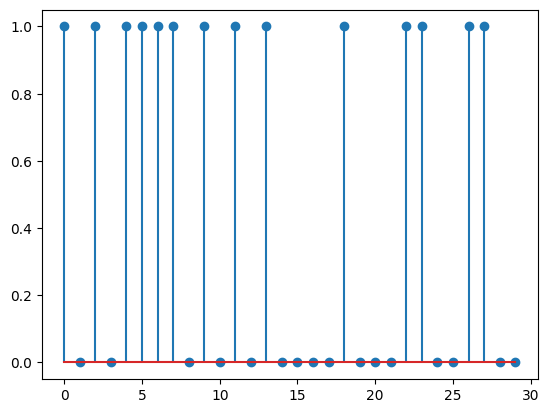

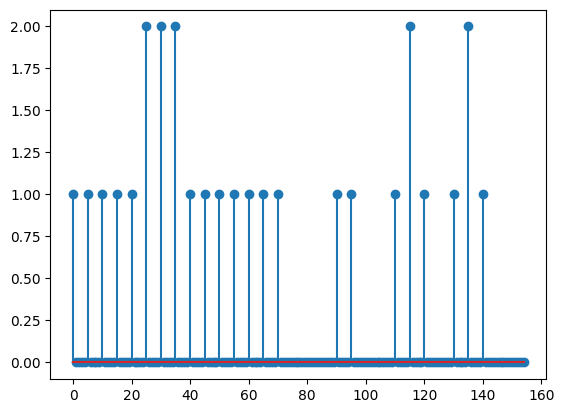

上采样后的信号: [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


: 

In [6]:
np.random.seed(7)
original_signal = generate_ook_signal(30)
plt.stem(original_signal)
plt.show()
prs_signal = prs_demodulate(original_signal)
up_factor = 5
signal = upsample(prs_signal, up_factor)
plt.stem(signal)
plt.show()
print("上采样后的信号:", signal)

In [24]:
def AWGNGen(M,Vpp,EbN0_dB,signal):  # Function to make AWGN
    EbN0_linear = 10**(EbN0_dB/10)  # dB to linear
    #Es = np.mean(np.abs(signal)**2)  # calculate the mean of signal power
    Es = (Vpp**2)/M
    Eb = Es / np.log2(M)  # calculate the power for each bits
    N0 = Eb / EbN0_linear  # Power Spectrum Density
    sigma = np.sqrt(N0/2)  # Standard Deviation
    noise = (sigma * np.random.randn(len(signal)).astype(np.float16)).astype(np.float16)  # AWGN
    return noise

In [25]:
noise = signal+AWGNGen(2,1,1,signal)

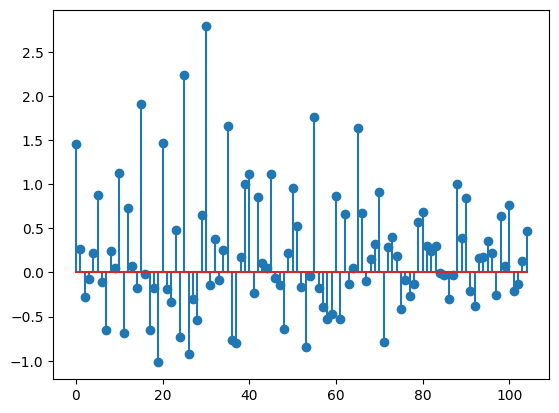

In [26]:
plt.stem(noise)
plt.show()

In [97]:
signal = noise + signal

In [ ]:
plt.stem(signal)
plt.show()

In [99]:
def downsample(signal, downsample_factor):
    return signal[::downsample_factor]

In [100]:
signal = downsample(signal, up_factor)

In [ ]:
plt.stem(signal)
plt.show()

In [29]:
def judge_signal(signal):
    return (signal > 0.5).astype(int)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0]


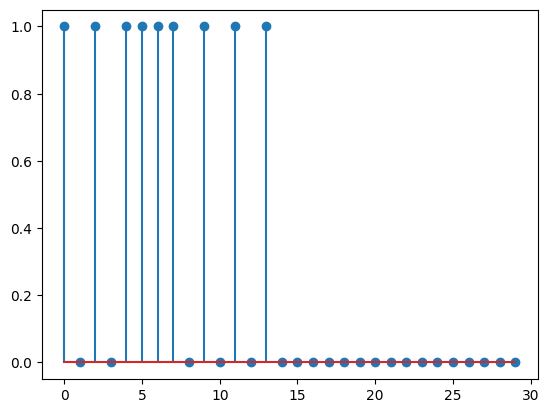

: 

In [39]:
s1  = [ 0.74519, 0.00033, 0.35662, 0.00259, 0.24840, 0.14324, 0.38279, 0.05792, 0.03716, 0.02163, 0.01754, 0.01575, 0.01259, 0.01046, 0.00908, 0.00825, 0.00774, 0.00740, 0.00717, 0.00700]
s2 = [ 0.75910, 0.01286, 0.75813, 0.08246, 0.78596, 0.96709, 0.99507, 0.96096, 0.01931, 0.75524, 0.06041, 0.75530, 0.03686, 0.69822, 0.00240, 0.09598, 0.47882, 0.37517, 0.44554, 0.16381]
s3 = [ 0.75734, 0.01295, 0.98089, 0.07548, 0.99654, 0.79802, 0.78488, 0.97166, 0.09031, 0.99832, 0.01790, 0.98459, 0.01959, 0.69984, 0.07923, 0.36161, 0.32911, 0.14820, 0.48866, 0.09903, 0.46501, 0.15230, 0.37789, 0.24470, 0.28637, 0.33315, 0.22305, 0.38046, 0.20592, 0.37618]
s4 = [ 0.75944, 0.09587, 0.75905, 0.75984, 0.73750, 0.72933, 0.74158, 0.74758, 0.75079, 0.75263, 0.75374, 0.75444, 0.75490, 0.75520, 0.75540, 0.75554, 0.75564, 0.75571, 0.75576, 0.75579, 0.75582, 0.75583, 0.75585, 0.75586, 0.75587, 0.75587, 0.75588, 0.75588, 0.75588, 0.75589]
judged_signal1 = judge_signal(np.array(s1))
judged_signal2 = judge_signal(np.array(s2))
judged_signal3 = judge_signal(np.array(s3))
judged_signal4 = judge_signal(np.array(s4))


print(judged_signal1)
print(judged_signal2)
plt.stem(judged_signal3)
plt.show()

In [ ]:
plt.stem(judged_signal)
plt.show()
print(original_signal)

In [105]:
def calculate_ber(tx_sequence, rx_sequence):
    """
    计算误码率（Bit Error Rate, BER）。
 
    参数：
    tx_sequence (list or array-like): 发送的比特序列。
    rx_sequence (list or array-like): 接收的比特序列。
 
    返回：
    float: 误码率（BER）。
    """
    # 确保发送和接收序列长度相同
    if len(tx_sequence) != len(rx_sequence):
        raise ValueError("发送序列和接收序列的长度必须相同")
 
    # 计算错误比特的数量
    num_errors = sum(tx != rx for tx, rx in zip(tx_sequence, rx_sequence))
 
    # 计算误码率
    ber = num_errors / len(tx_sequence)
 
    return ber

In [123]:
ber = calculate_ber(original_signal, judged_signal)
print("误码率：", ber)

误码率： 0.16


In [124]:
np.savetxt('./data1.csv',original_signal, delimiter=',')

In [ ]:
def prs_generate(singal,M):
    a0 = np.pad(signal,(0,M),'constant',constant_values=(0,0))
    a1 = np.pad(signal,(M,0),'constant',constant_values=(0,0))
    return np.bitwise_and(a0,a1)


In [ ]:
def prs_demodulate(signal,M = 1):
    signal = np.pad(signal,(M,0),'constant',constant_values=(0,0)) + np.pad(signal,(M,1),'constant',constant_values=(0,0))
    return signal

In [ ]:
test = np.array([1, 2, 3,4,5,6,7,8])
# ans = np.resize(test,(1,10))
ans = np.pad(test,(1,0),'constant',constant_values=(0,0)) #前面填充1位，后面填充0位，前面填充值为0，后面填充值为0
print(ans)

[0 1 2 3 4 5 6 7 8]


In [ ]:
path = r'D:\\vscode\\work_ppace\\UOWC\\data1.csv'
with open(path,encoding = 'utf-8') as f:
    data = np.loadtxt(f,delimiter = ',')
    print(data)

In [ ]:
x_dim = 10
noise = np.random.rand(x_dim)
print(noise)

[0.41558692 0.34588046 0.80000143 0.11282725 0.58434219 0.35671884
 0.42254497 0.98253038 0.7416262  0.20997922]


: 